<a href="https://colab.research.google.com/github/elizamelo/FisicaGeral/blob/main/RetadeCalibracaoDinamometro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dados experimentais
F = np.array([3, 4, 5, 10, 15, 20, 25])       # Força (gf)
l = np.array([9.2, 12.2, 15.0, 30.0, 44.6, 59.5, 75.1])  # Elongação (mm)
N = len(F)



In [2]:
# Médias e somatórios
x_mean = np.mean(F)
y_mean = np.mean(l)
Sxy = np.sum((F - x_mean) * (l - y_mean))
Sxx = np.sum((F - x_mean)**2)

In [3]:
# Ajuste analítico
a = Sxy / Sxx
b = y_mean - a * x_mean

In [4]:
# Correlação linear
r = Sxy / (np.sqrt(np.sum((F - x_mean)**2) * np.sum((l - y_mean)**2)))

# Resíduos e sigma_y
residuos = l - (a * F + b)
sigma_y = np.sqrt(np.sum(residuos**2) / (N - 2))

# Incertezas nos parâmetros
sigma_x = np.std(F, ddof=1)
sigma_a = sigma_y / (sigma_x * np.sqrt(N))
sigma_b = sigma_a * np.sqrt(np.mean(F**2))

In [5]:
# Mostra os resultados
print("=== Ajuste Analítico ===")
print(f"a = {a:.4f} ± {sigma_a:.4f} mm/gf")
print(f"b = {b:.4f} ± {sigma_b:.4f} mm")
print(f"r = {r:.6f}")
print(f"σ_y = {sigma_y:.4f} mm")

=== Ajuste Analítico ===
a = 2.9831 ± 0.0117 mm/gf
b = 0.1405 ± 0.1657 mm
r = 0.999955
σ_y = 0.2653 mm



=== Interpolação Inversa ===
Para l_obs = 42.0 mm:
F estimada = 14.03 ± 0.09 gf


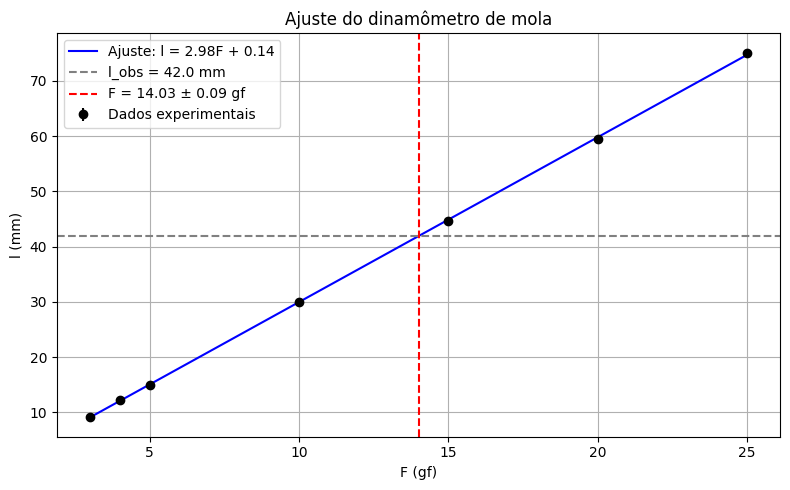

In [6]:
# --- Interpolação inversa ---
# Suponha que observamos um valor de elongação (l_obs) e queremos a força correspondente

l_obs = 42.0  # mm (exemplo)
F_interp = (l_obs - b) / a
sigma_F_interp = sigma_y / a

print("\n=== Interpolação Inversa ===")
print(f"Para l_obs = {l_obs} mm:")
print(f"F estimada = {F_interp:.2f} ± {sigma_F_interp:.2f} gf")

# --- Gráfico do ajuste ---
F_fit = np.linspace(min(F), max(F), 100)
l_fit = a * F_fit + b

plt.figure(figsize=(8, 5))
plt.errorbar(F, l, yerr=sigma_y, fmt='o', color='black', label='Dados experimentais')
plt.plot(F_fit, l_fit, color='blue', label=f'Ajuste: l = {a:.2f}F + {b:.2f}')

# Interpolação inversa no gráfico
plt.axhline(l_obs, color='gray', linestyle='--', label=f'l_obs = {l_obs} mm')
plt.axvline(F_interp, color='red', linestyle='--', label=f'F = {F_interp:.2f} ± {sigma_F_interp:.2f} gf')
plt.xlabel('F (gf)')
plt.ylabel('l (mm)')
plt.title('Ajuste do dinamômetro de mola')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

